In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.image as mpimg

Read the data. One row is one participant.


In [2]:
df = pd.read_csv("data.csv")
df

,sex,bib,team,place,name,nationality,swim_time,swim_place,t1_time,bike_time,bike_place,t2_time,run_time,run_place,total_time
0,M,1197,Post SV Nürnberg,1,RUPPRECHT Alexander,DEU,00:24:17,10,00:01:55,00:58:09,1,00:01:11,00:34:59,3.0,02:00:28
1,M,1188,Twin Neumarkt,2,WIEDEMANN Matteo,DEU,00:23:51,8,00:01:55,00:59:43,2,00:01:41,00:33:50,1.0,02:00:57
2,M,1214,NaN,3,HARTMANN Johannes,DEU,00:20:53,2,00:02:30,01:02:05,4,00:01:53,00:35:39,5.0,02:02:58
3,M,1120,Donau Run Ingolstadt,4,OSTERMEIR Lukas,DEU,00:23:02,4,00:01:53,01:03:49,8,00:02:28,00:34:31,2.0,02:05:42
4,M,1097,Halberhai e.V Nürnberg.,5,DOWALIL Christoph,DEU,00:23:07,5,00:02:06,01:03:14,5,00:01:50,00:36:06,7.0,02:06:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,F,1090,NaN,35,DISTLER Stephanie,USA,00:44:13,35,00:05:40,01:43:56,36,00:05:09,00:55:51,26.0,03:34:46
184,F,1071,NaN,36,KLINGSHIRN Carolin,DEU,00:53:55,36,00:09:34,01:29:32,33,00:06:32,01:11:27,36.0,03:50:58
185,F,1064,Mind2Motion,DNF,SCHWARZ Carolin,DEU,00:34:06,0:34:06,00:03:04,NaN,NaN,NaN,NaN,NaN,NaN
186,F,1040,Rocket Racing,DNF,GÖBEL Alina,DEU,00:37:13,0:37:13,00:03:09,NaN,NaN,NaN,NaN,NaN,NaN


Convert the participant data into data about nationalities.


In [3]:
nationalities = df.groupby("nationality").size().reset_index()

iso_to_country = {
    "ARG": "Argentina",
    "AUT": "Austria",
    "CHE": "Switzerland",
    "DEU": "Germany",
    "DNK": "Denmark",
    "ESP": "Spain",
    "FRA": "France",
    "GBR": "United Kingdom",
    "HRV": "Croatia",
    "ITA": "Italy",
    "ROU": "Romania",
    "USA": "United States",
    "ZAF": "South Africa",
}


nationalities["label"] = nationalities["nationality"].map(iso_to_country)
nationalities = nationalities.rename(columns={0: "count"})
nationalities

,nationality,count,label
0,ARG,1,Argentina
1,AUT,1,Austria
2,CHE,1,Switzerland
3,DEU,171,Germany
4,DNK,1,Denmark
5,ESP,1,Spain
6,FRA,4,France
7,GBR,3,United Kingdom
8,HRV,1,Croatia
9,ITA,1,Italy


Create a new column to categorize countries based on number of participants.


In [4]:
def categorize_count(count):
    if count == 1:
        return "Exactly 1"
    elif count > 1 and count <= 100:
        return "More than 1"
    elif count > 100:
        return "More than 100"


nationalities["category"] = nationalities["count"].apply(categorize_count)
nationalities

,nationality,count,label,category
0,ARG,1,Argentina,Exactly 1
1,AUT,1,Austria,Exactly 1
2,CHE,1,Switzerland,Exactly 1
3,DEU,171,Germany,More than 100
4,DNK,1,Denmark,Exactly 1
5,ESP,1,Spain,Exactly 1
6,FRA,4,France,More than 1
7,GBR,3,United Kingdom,More than 1
8,HRV,1,Croatia,Exactly 1
9,ITA,1,Italy,Exactly 1


In [5]:
fig = px.choropleth(
    nationalities,
    locations="nationality",
    locationmode="ISO-3",
    basemap_visible=True,
    color="category",
    title="Participants' nationalities - DATAGROUP Triathlon 2024",
    hover_name="label",
    category_orders={"category": ["Exactly 1", "More than 1", "More than 100"]},
    color_discrete_map={
        "Exactly 1": "blue",
        "More than 1": "green",
        "More than 100": "red",
    },
    hover_data={
        "count": True,
        "label": False,
        "category": False,
        "nationality": False,
    },
)


fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Number of Participants: %{customdata[0]}<extra></extra>"
)


fig.update_layout(
    title={
        "text": "Participants' nationalities - DATAGROUP Triathlon 2024<br><sup>Olympic Distance Male & Female</sup>",
        "y": 0.95,  # Vertical position of the title
        "x": 0.5,  # Horizontal center
        "xanchor": "center",  # Ensures the title is centered
        "yanchor": "top",  # Aligns it from the top
    },
    legend_title_text="",
    legend=dict(
        x=1,  # Position the legend on the right side (1 is far right)
        y=0.5,  # Position the legend in the middle vertically
        xanchor="left",  # Anchor the legend by its left side
        yanchor="middle",  # Anchor the legend by its middle
        orientation="v",  # Vertical orientation of the legend
    ),
    width=1000,
    height=600,
)

fig.show()

In [6]:
fig.write_image(file="participants-nationalities.png", width=2000, height=1000)

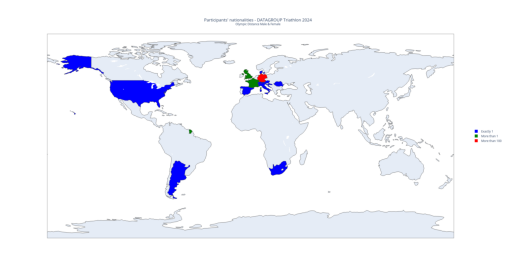

In [7]:
img = mpimg.imread("participants-nationalities.png")
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()